In [184]:
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize


In [185]:
suby = ['NFLX','AAPL','TSLA','BMRN','MRNA','UBER','AMZN-MM','CNC','NVDA','FDX']

In [186]:

n = 'VIXY-MM'
url = url=f'https://sandbox.iexapis.com/stable/stock/{n}/chart/1m?token=Tpk_12408ef88e28400f845e4acea5dd0f6e'
response = requests.get(url)
res_j = response.json()
res_j[0].keys()
data = pd.DataFrame(res_j)
data1 = data[['date','fClose']]
df_new = data1.rename(columns={'fClose': f'{n}'})




In [187]:
for i in suby:
    url=f'https://sandbox.iexapis.com/stable/stock/{i}/chart/1m?token=Tpk_12408ef88e28400f845e4acea5dd0f6e'
    response = requests.get(url)
    res_j = response.json()
    data = pd.DataFrame(res_j)

    data_ca = data.copy()
    data_ca=  data[['fClose']]
    data_ca = data_ca.rename(columns={'fClose': f'{i}'})

    df_ori= pd.concat([df_new, data_ca], axis=1,)
    df_new = df_ori
df_new    



,date,VIXY-MM,NFLX,AAPL,TSLA,BMRN,MRNA,UBER,AMZN-MM,CNC,NVDA,FDX
0,2021-01-04,298.37,554.96,138.40,738.08,91.45,106.19,53.00,66768.00,62.97,544.50,268.45
1,2021-01-05,310.24,546.26,131.64,757.92,88.60,112.19,53.20,63803.00,62.28,531.91,257.92
2,2021-01-06,300.27,526.00,133.00,757.37,86.00,114.00,55.82,65317.00,63.56,551.35,262.02
3,2021-01-07,310.41,510.15,132.80,771.35,90.82,116.31,52.82,63953.81,67.94,514.79,264.31
4,2021-01-11,304.36,527.23,134.79,839.70,92.78,120.13,57.16,64547.00,71.68,536.67,254.15
5,2021-01-13,274.17,520.80,132.37,896.11,93.64,114.15,54.44,66054.00,70.95,549.47,247.64
6,2021-01-14,272.33,511.50,134.56,826.16,84.59,120.59,57.02,63664.97,71.06,552.22,245.52
7,2021-01-15,280.29,499.48,130.70,862.38,82.66,130.71,59.26,64278.58,69.70,556.68,252.88
8,2021-01-18,284.72,515.74,135.38,881.14,84.88,125.46,61.00,63652.00,66.79,556.92,264.79
9,2021-01-19,279.70,512.23,134.78,876.00,82.11,134.49,59.32,63375.00,67.37,540.75,262.01


In [248]:
df_new.dropna()
df_new =df_new.drop(['VIXY-MM'], axis=1)
df_new

,date,NFLX,AAPL,TSLA,BMRN,MRNA,UBER,AMZN-MM,CNC,NVDA,FDX
0,2021-01-04,554.96,138.40,738.08,91.45,106.19,53.00,66768.00,62.97,544.50,268.45
1,2021-01-05,546.26,131.64,757.92,88.60,112.19,53.20,63803.00,62.28,531.91,257.92
2,2021-01-06,526.00,133.00,757.37,86.00,114.00,55.82,65317.00,63.56,551.35,262.02
3,2021-01-07,510.15,132.80,771.35,90.82,116.31,52.82,63953.81,67.94,514.79,264.31
4,2021-01-11,527.23,134.79,839.70,92.78,120.13,57.16,64547.00,71.68,536.67,254.15
5,2021-01-13,520.80,132.37,896.11,93.64,114.15,54.44,66054.00,70.95,549.47,247.64
6,2021-01-14,511.50,134.56,826.16,84.59,120.59,57.02,63664.97,71.06,552.22,245.52
7,2021-01-15,499.48,130.70,862.38,82.66,130.71,59.26,64278.58,69.70,556.68,252.88
8,2021-01-18,515.74,135.38,881.14,84.88,125.46,61.00,63652.00,66.79,556.92,264.79
9,2021-01-19,512.23,134.78,876.00,82.11,134.49,59.32,63375.00,67.37,540.75,262.01


In [250]:
df1 = df_new.copy()

df1 = df_new.agg(['mean', 'min','max','std','var','median','skew','kurt'])
#,'median','mode','skew','kurt'


df1 = df1.round(2)
df1

,NFLX,AAPL,TSLA,BMRN,MRNA,UBER,AMZN-MM,CNC,NVDA,FDX
mean,537.70,136.70,842.20,88.01,133.07,55.66,65568.23,65.22,541.75,256.55
min,499.48,130.31,738.08,82.11,106.19,49.86,61669.00,59.51,514.79,244.57
max,592.66,145.84,918.80,93.64,178.47,61.00,69663.27,71.68,558.50,268.45
std,28.00,5.02,51.44,3.47,19.05,3.14,2260.55,3.54,12.13,7.15
var,784.22,25.24,2645.90,12.07,363.04,9.86,5110096.46,12.52,147.13,51.12
median,527.98,135.05,853.92,87.20,130.05,56.22,65479.68,64.25,541.86,257.69
skew,0.60,0.56,-0.76,0.10,0.81,-0.22,0.08,0.54,-0.52,-0.27
kurt,-0.84,-1.11,-0.37,-1.08,0.14,-1.04,-0.99,-0.73,-0.33,-0.85


In [231]:
import numpy as np
df_new1 = df_new.copy()
f'{suby[1]}'
#plt.plot(df_new['date'],df_new[f'{suby[1]}'])

df_new1["date"].replace((np.inf, -np.inf, np.nan), 0, inplace=True)
#df_new1['VIXY-MM','NFLX','AAPL','TSLA','BMRN','MRNA','UBER','AMZN-MM','CNC','NVDA','FDX'].astype(int)
df_new1.dtypes
df_new[f'{suby[1]}']

0     138.40
1     131.64
2     133.00
3     132.80
4     134.79
5     132.37
6     134.56
7     130.70
8     135.38
9     134.78
10    130.31
11    131.99
12    135.31
13    143.27
14    142.00
15    144.72
16    145.84
17    143.58
18    141.40
19    137.26
Name: AAPL, dtype: float64

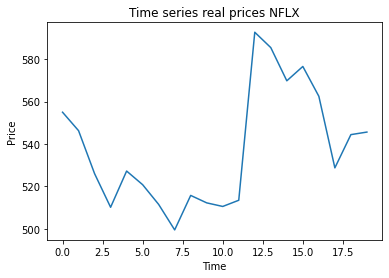

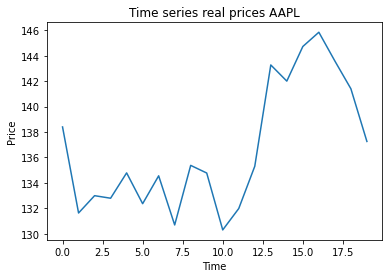

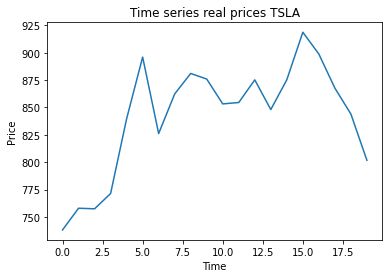

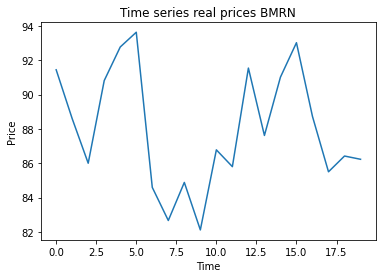

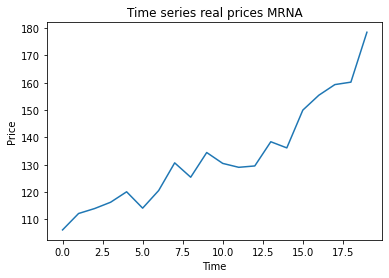

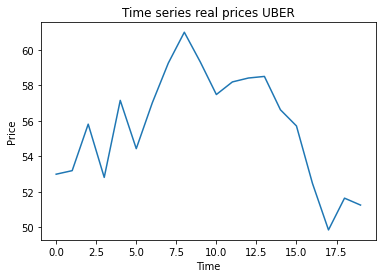

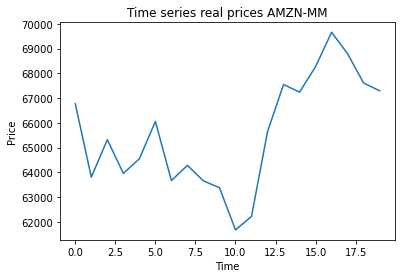

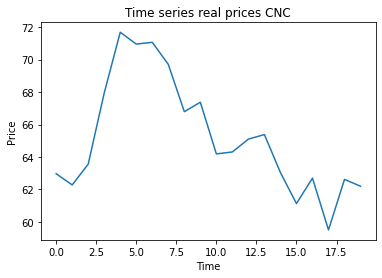

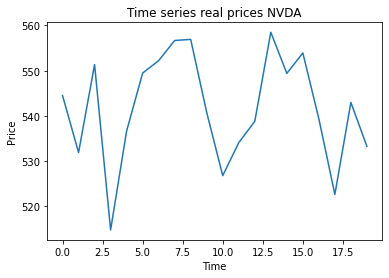

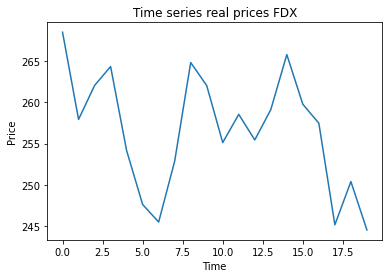

In [247]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#def plot_timeseries_price(df_new, suby):
    # plot timeseries of price


for i in range(len(suby)):
    da = list(df_new['date'])    
    li =  list(df_new[f'{suby[i]}'])
    plt.figure()
    plt.plot(li)
    plt.title('Time series real prices ' + suby[i])
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()
   

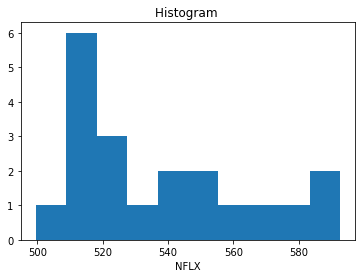

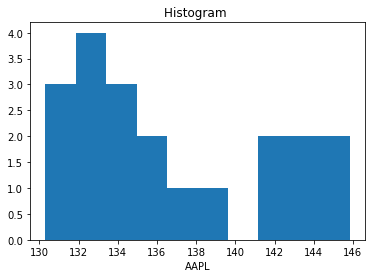

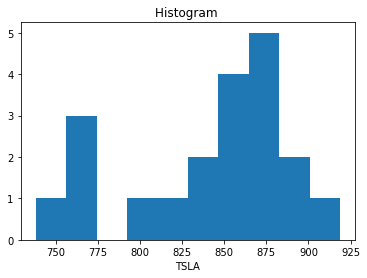

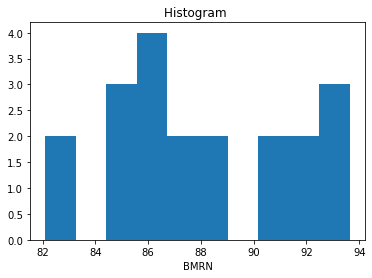

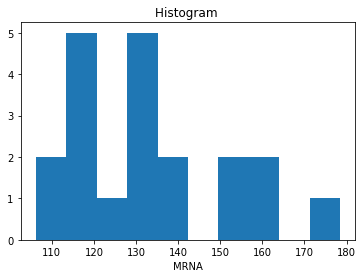

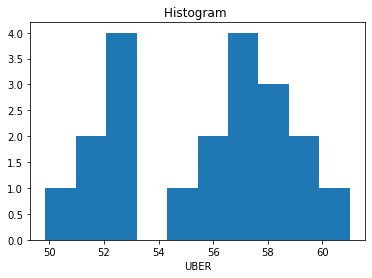

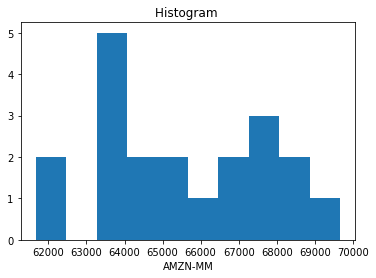

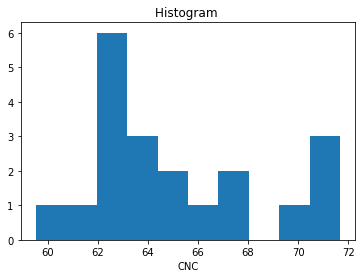

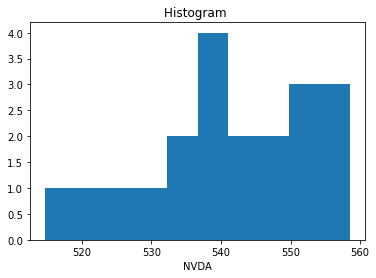

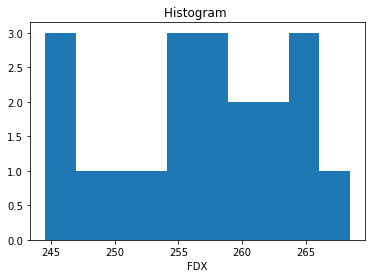

In [254]:

for i in range(len(suby)):
    plt.figure()
    li =list (df_new[f'{suby[i]}'])
    plt.hist(li)
    plt.title('Histogram ' )
    plt.xlabel(f'{suby[i]}')
    plt.show()

In [206]:
import re
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

In [289]:
suby = ['NFLX','AAPL','TSLA','BMRN','MRNA','UBER','AMZN-MM','CNC','NVDA','FDX']
suby1 = ['Netflix','Apple','Tesla,_Inc.','BioMarin_Pharmaceutical','BioMarin_Pharmaceutical','Uber','Amazon_(company)','Centene_Corporation','Nvidia','FedEx']

len(suby1)

10

In [294]:
l = []
isinl = []
urlsa =[]
for i in range(len(suby1)):
    url = f'https://es.wikipedia.org/wiki/{suby1[i]}'
    urlsa.append(url)


for url in urlsa:
         
        try:
            
            l =[]
            req = requests.get(url)       
            sopa = BeautifulSoup(req.content, 'html.parser')
            imagen = sopa.find_all('tr')
            for name in imagen:
                l.append(name.get_text())
            if 'ISIN' in  l[5]:  
                isin = l[5].replace('ISIN\n','')
            else:
                isin = 'Not found'
            isinl.append(isin)
            
            
        except:
              print(url)    
              pass
isinl 

['US64110L1061',
 'US0378331005',
 'US88160R1014',
 'Not found',
 'Not found',
 'US90353T1007',
 'Not found',
 'Not found',
 'US67066G1040',
 'US31428X1063']

In [303]:
import numpy as np
isi = np.transpose(isinl)
isi = [list(list(isi))]

In [304]:
dfNew = pd.DataFrame(isi, columns = ['NFLX','AAPL','TSLA','BMRN','MRNA','UBER','AMZN-MM','CNC','NVDA','FDX'])
dfNew

,NFLX,AAPL,TSLA,BMRN,MRNA,UBER,AMZN-MM,CNC,NVDA,FDX
0,US64110L1061,US0378331005,US88160R1014,Not found,Not found,US90353T1007,Not found,Not found,US67066G1040,US31428X1063


In [308]:
ori =df1.copy()
df=ori.append(dfNew,ignore_index=False)
df
df.rename(index={0:'isin'}, inplace=True)
df

,NFLX,AAPL,TSLA,BMRN,MRNA,UBER,AMZN-MM,CNC,NVDA,FDX
mean,537.7,136.7,842.2,88.01,133.07,55.66,65568.2,65.22,541.75,256.55
min,499.48,130.31,738.08,82.11,106.19,49.86,61669,59.51,514.79,244.57
max,592.66,145.84,918.8,93.64,178.47,61,69663.3,71.68,558.5,268.45
std,28,5.02,51.44,3.47,19.05,3.14,2260.55,3.54,12.13,7.15
var,784.22,25.24,2645.9,12.07,363.04,9.86,5.1101e+06,12.52,147.13,51.12
median,527.98,135.05,853.92,87.2,130.05,56.22,65479.7,64.25,541.86,257.69
skew,0.6,0.56,-0.76,0.1,0.81,-0.22,0.08,0.54,-0.52,-0.27
kurt,-0.84,-1.11,-0.37,-1.08,0.14,-1.04,-0.99,-0.73,-0.33,-0.85
isin,US64110L1061,US0378331005,US88160R1014,Not found,Not found,US90353T1007,Not found,Not found,US67066G1040,US31428X1063
